In [1]:
# from https://yyatsuo.com/post-1656/
import numpy as np
import matplotlib.pyplot as plt

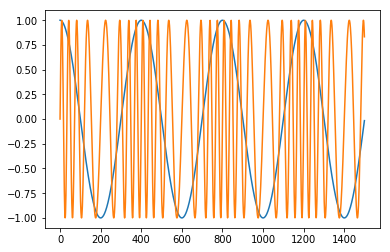

In [2]:
sampling_rate = 100000.0 # 100MHz
t = np.arange(0.5 * sampling_rate) / sampling_rate # 0.5sec
fc = 2000 # carry
fs = 250
df = 1000 # Maximun frequency deviation 
Vs = np.cos(2*np.pi*fs*t) # Signal wave
Vm = np.sin(2*np.pi*fc*t + (df/fs) * np.sin(2*np.pi*fs*t)) # base
plt.plot(Vs[:1500])
plt.plot(Vm[:1500])
plt.show()

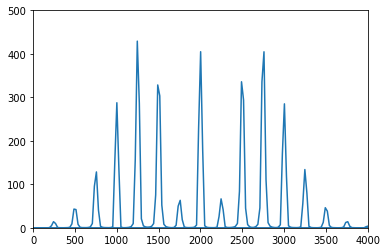

In [13]:
N = 4096 # FFT samples
freqs = np.fft.fft(Vm[:N] * np.hanning(N)) #hanning window
freqs_list = np.fft.fftfreq(N,d=1.0/sampling_rate)
amplitude = [np.sqrt(c.real**2 + c.imag**2) for c in freqs]
plt.axis([0,4000, 0, 500])
plt.plot(freqs_list, amplitude)
plt.show()

# vfはベッセル関数の形 vf = Vc * sigma[n=-inf to n= inf](Jn(mf)sin(wc + n * ws)t)
# 側帯波は無限にあるが、カットしてる。というかベッセル関数の性質として０に近似されていく

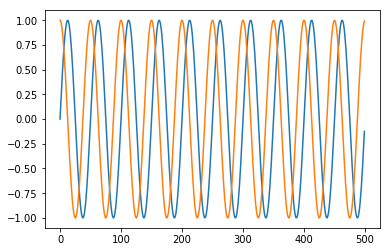

In [14]:
I1 = np.sin(2*np.pi*fc*t)
Q1 = np.cos(2*np.pi*fc*t)
plt.plot(I1[0:500])
plt.plot(Q1[0:500])
plt.show()

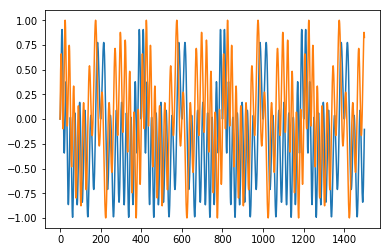

In [15]:
I2 = I1 * Vm
Q2 = Q1 * Vm
plt.plot(I2[0:1500])
plt.plot(Q2[0:1500])
plt.show()

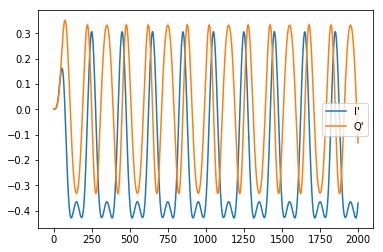

In [16]:
import scipy.signal as sg
 
#ナイキスト周波数
f_nyq =  sampling_rate / 2.0 
 
#カットオフ周波数
f_cutoff = fc/2.0
 
#タップ数
numtaps = 100
lpf = sg.firwin(numtaps, f_cutoff/f_nyq)
I3 = sg.lfilter(lpf, 1, I2)   #I'
Q3 = sg.lfilter(lpf, 1, Q2)   #Q'
 
plt.plot(I3[0:2000], label="I'")
plt.plot(Q3[0:2000], label="Q'")
plt.legend()
plt.show()

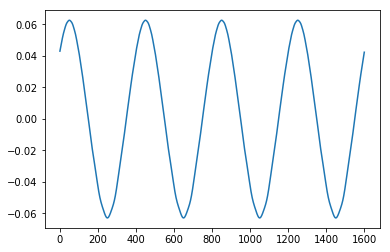

In [19]:
Vout = np.empty(Vm.size)
for i in range(Vout.size-1):
    I = I3[i]
    Q = Q3[i]
    dI = I3[i+1] - I3[i]
    dQ = Q3[i+1] - Q3[i]
 
    M = I*I + Q*Q
    if M == 0:
        M = 1
 
    Vout[i] = (I * dQ - Q * dI) / M
 
plt.plot(Vout[400:2000])
plt.show()